In [3]:
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.datasets import fetch_olivetti_faces
from sklearn import decomposition 
from skimage.util import random_noise


In [5]:
faces = fetch_olivetti_faces()

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to C:\Users\kobik\scikit_learn_data


In [6]:
normalized_image = faces.images[61]
original_image = (normalized_image*255).astype(np.uint8)
print(original_image)
print(normalized_image)


[[ 77  77 140 ...  31  32  37]
 [ 82  97 161 ...  27  29  28]
 [ 86 122 174 ...  41  30  32]
 ...
 [ 55  52  47 ...  56  60  65]
 [ 52  59  47 ...  56  61  59]
 [ 52  54  44 ...  56  62  56]]
[[0.30578512 0.30578512 0.5495868  ... 0.12396694 0.12809917 0.14876033]
 [0.32231405 0.38429752 0.6322314  ... 0.10743801 0.11570248 0.11157025]
 [0.338843   0.47933885 0.6859504  ... 0.16115703 0.11983471 0.12809917]
 ...
 [0.21900827 0.20661157 0.18595041 ... 0.2231405  0.23553719 0.25619835]
 [0.20661157 0.23140496 0.18595041 ... 0.2231405  0.23966943 0.23140496]
 [0.20661157 0.21487603 0.17355372 ... 0.2231405  0.24380165 0.2231405 ]]


In [7]:
faces.keys()

dict_keys(['data', 'images', 'target', 'DESCR'])

In [8]:
print(faces.DESCR)


.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: https://cam-orl.co.uk/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position
    (with tolerance for some side movement).

**Data Set Characteristics:**

=================   =====================
Classes              

In [9]:
faces.target

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13,
       13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22,
       22, 22, 22, 22, 22

In [10]:
print('faces.images: ', faces.images.shape)
print('faces.data: ', faces.data.shape)

faces.images:  (400, 64, 64)
faces.data:  (400, 4096)


In [11]:
print(faces.images[61])

[[0.30578512 0.30578512 0.5495868  ... 0.12396694 0.12809917 0.14876033]
 [0.32231405 0.38429752 0.6322314  ... 0.10743801 0.11570248 0.11157025]
 [0.338843   0.47933885 0.6859504  ... 0.16115703 0.11983471 0.12809917]
 ...
 [0.21900827 0.20661157 0.18595041 ... 0.2231405  0.23553719 0.25619835]
 [0.20661157 0.23140496 0.18595041 ... 0.2231405  0.23966943 0.23140496]
 [0.20661157 0.21487603 0.17355372 ... 0.2231405  0.24380165 0.2231405 ]]


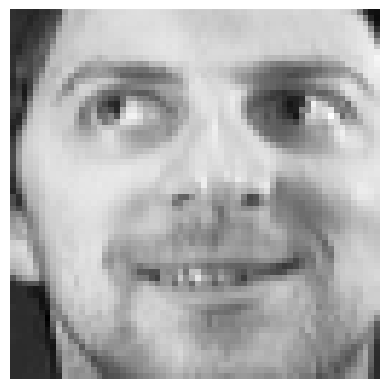

In [12]:
plt.imshow(faces.images[62], cmap = "gray")
plt.axis('off')
plt.show()

In [36]:
facesNoise = random_noise(faces.data, mode = 'gaussian', var = 0.05)
facesNoise.shape

(400, 4096)

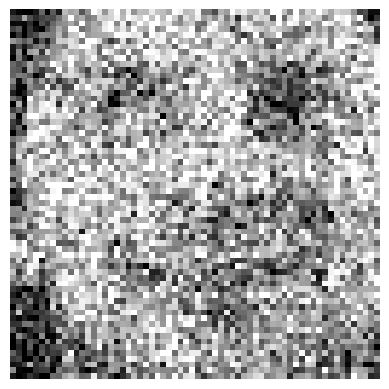

In [37]:
plt.imshow(np.reshape(facesNoise[62], (64,64)), cmap = "gray")
plt.axis('off')
plt.show()

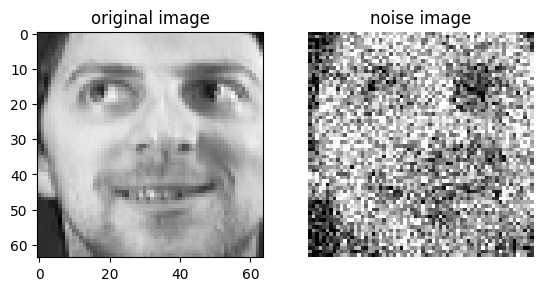

In [38]:
fig, ax = plt.subplots(nrows = 1, ncols = 2)
ax[0].set_title("original image")
ax[0].imshow(np.reshape(faces.data[62],(64,64)), cmap = "gray" )
plt.axis('off')
ax[1].set_title('noise image')
ax[1].imshow(np.reshape(facesNoise[62], (64,64)), cmap='gray')
ax[1].axis('off')

plt.show()



In [40]:
pca = decomposition.PCA(n_components = 40)
pca.fit(facesNoise)

PCA(n_components=40)

In [43]:
pcaFaces = pca.transform(facesNoise)
pcaFaces.shape

(400, 40)

In [44]:
facesRecons = pca.inverse_transform(pcaFaces)
facesRecons.shape

(400, 4096)

(-0.5, 63.5, 63.5, -0.5)

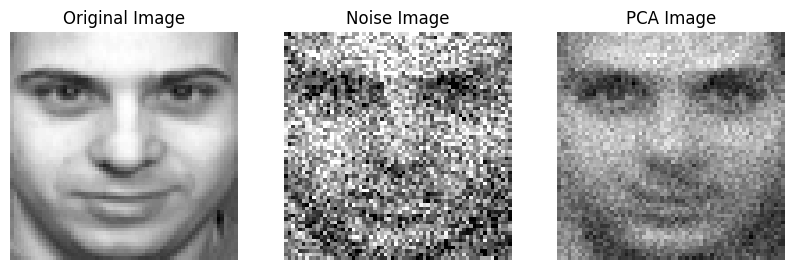

In [45]:
num = np.random.randint(0, 400, 1)

fig, ax = plt.subplots(figsize = (10, 6), nrows=1, ncols=3)

ax[0].set_title('Original Image')
ax[0].imshow(np.reshape(faces.data[num], (64,64)), cmap='gray')
ax[0].axis('off')

ax[1].set_title('Noise Image')
ax[1].imshow(np.reshape(facesNoise[num], (64,64)), cmap='gray')
ax[1].axis('off')

ax[2].set_title('PCA Image')
ax[2].imshow(np.reshape(facesRecons[num], (64,64)), cmap='gray')
ax[2].axis('off')

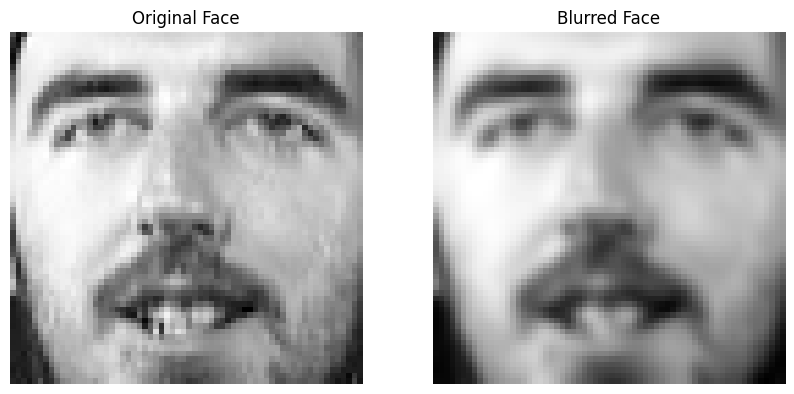

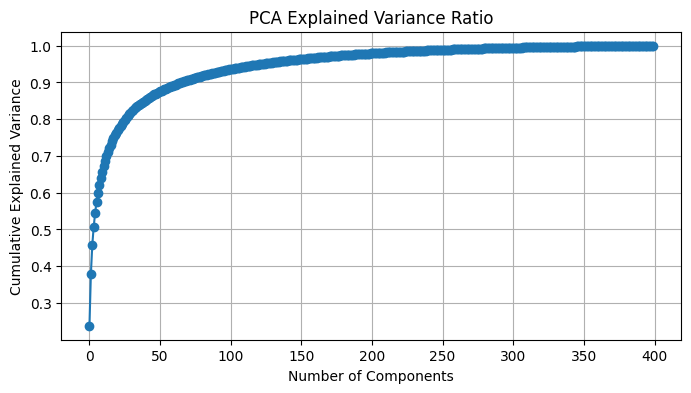

In [46]:
from sklearn.datasets import fetch_olivetti_faces
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import gaussian_filter

# Load the Olivetti faces dataset
faces = fetch_olivetti_faces()
X = faces.data
images = faces.images

# Choose a random face
np.random.seed(42)  # For reproducibility
random_face = np.random.randint(0, X.shape[0])

# Apply Gaussian blur to the selected face
blurred_face = gaussian_filter(images[random_face], sigma=1)

# Apply PCA to the dataset
pca = PCA()
pca.fit(X)

# Get the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Plot the original, blurred face, and explained variance ratio
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Original face
ax[0].imshow(images[random_face], cmap='gray')
ax[0].set_title("Original Face")
ax[0].axis('off')

# Blurred face
ax[1].imshow(blurred_face, cmap='gray')
ax[1].set_title("Blurred Face")
ax[1].axis('off')

# Show the variance ratio plot
plt.figure(figsize=(8, 4))
plt.plot(np.cumsum(explained_variance_ratio), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Explained Variance Ratio')
plt.grid(True)
plt.show()
